<a href="https://colab.research.google.com/github/Preetraj2002/Data_Visualization-Prog_lang/blob/main/Data_Visualize-Prog_lang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get .csv file


In [48]:
!gdown --id 1aSebOzoIxL68ufpg98FykDAeGfk5C_LF

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1aSebOzoIxL68ufpg98FykDAeGfk5C_LF
To: /content/QueryResults.csv
100% 91.2k/91.2k [00:00<00:00, 4.39MB/s]


## Import Statements

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [50]:
df = pd.read_csv("QueryResults.csv",names=["DATE","TAG","POSTS"],header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [51]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [52]:
df.tail()

,DATE,TAG,POSTS
2463,2023-05-01 00:00:00,php,2268
2464,2023-05-01 00:00:00,python,12917
2465,2023-05-01 00:00:00,r,2947
2466,2023-05-01 00:00:00,ruby,262
2467,2023-05-01 00:00:00,swift,1095


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [53]:
df.shape

(2468, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [54]:
df.count()

DATE     2468
TAG      2468
POSTS    2468
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [55]:
df.groupby("TAG").sum()

<ipython-input-55-a2cc2c872c1d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("TAG").sum()


,POSTS
TAG,
assembly,42795
c,396495
c#,1591891
c++,793950
delphi,50928
go,69176
java,1896794
javascript,2494544
perl,67652


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [56]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,178,178
c,178,178
c#,179,179
c++,178,178
delphi,178,178
go,163,163
java,178,178
javascript,178,178
perl,178,178


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [57]:
df["DATE"][0]

'2008-07-01 00:00:00'

In [58]:
type(df["DATE"][0])

str

In [59]:
pd.to_datetime(df["DATE"][0])

Timestamp('2008-07-01 00:00:00')

In [60]:
df["DATE"] = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [61]:
pivoted_df = df.pivot(index="DATE",columns="TAG",values="POSTS")
pivoted_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [62]:
pivoted_df.shape

(179, 14)

In [63]:
pivoted_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [64]:
pivoted_df.count()

TAG
assembly      178
c             178
c#            179
c++           178
delphi        178
go            163
java          178
javascript    178
perl          178
php           178
python        178
r             176
ruby          178
swift         170
dtype: int64

In [65]:
pivoted_df.fillna(0,inplace = True)

In [66]:
pivoted_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1641.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,536.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,956.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0


In [67]:
pivoted_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

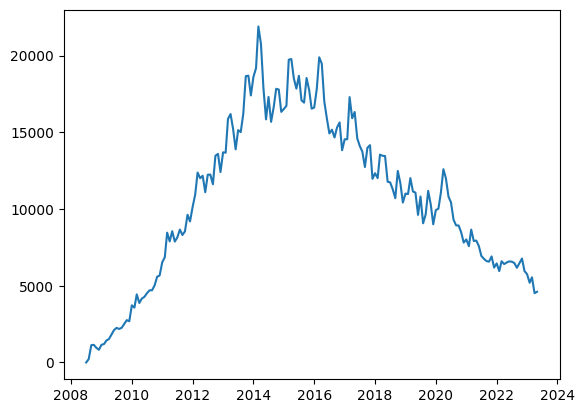

In [68]:
s = pivoted_df["java"]
plt.plot(s.index,s.values)

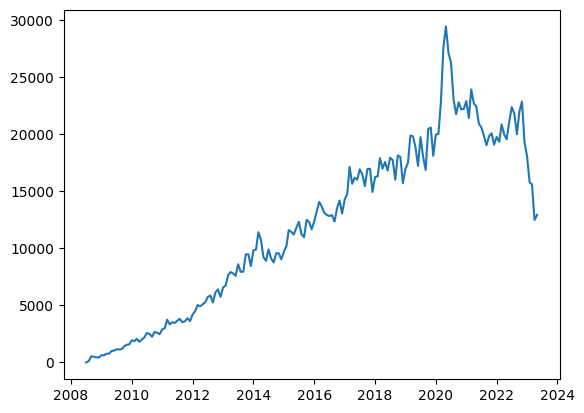

In [69]:
s = pivoted_df["python"]
plt.plot(s.index,s.values)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

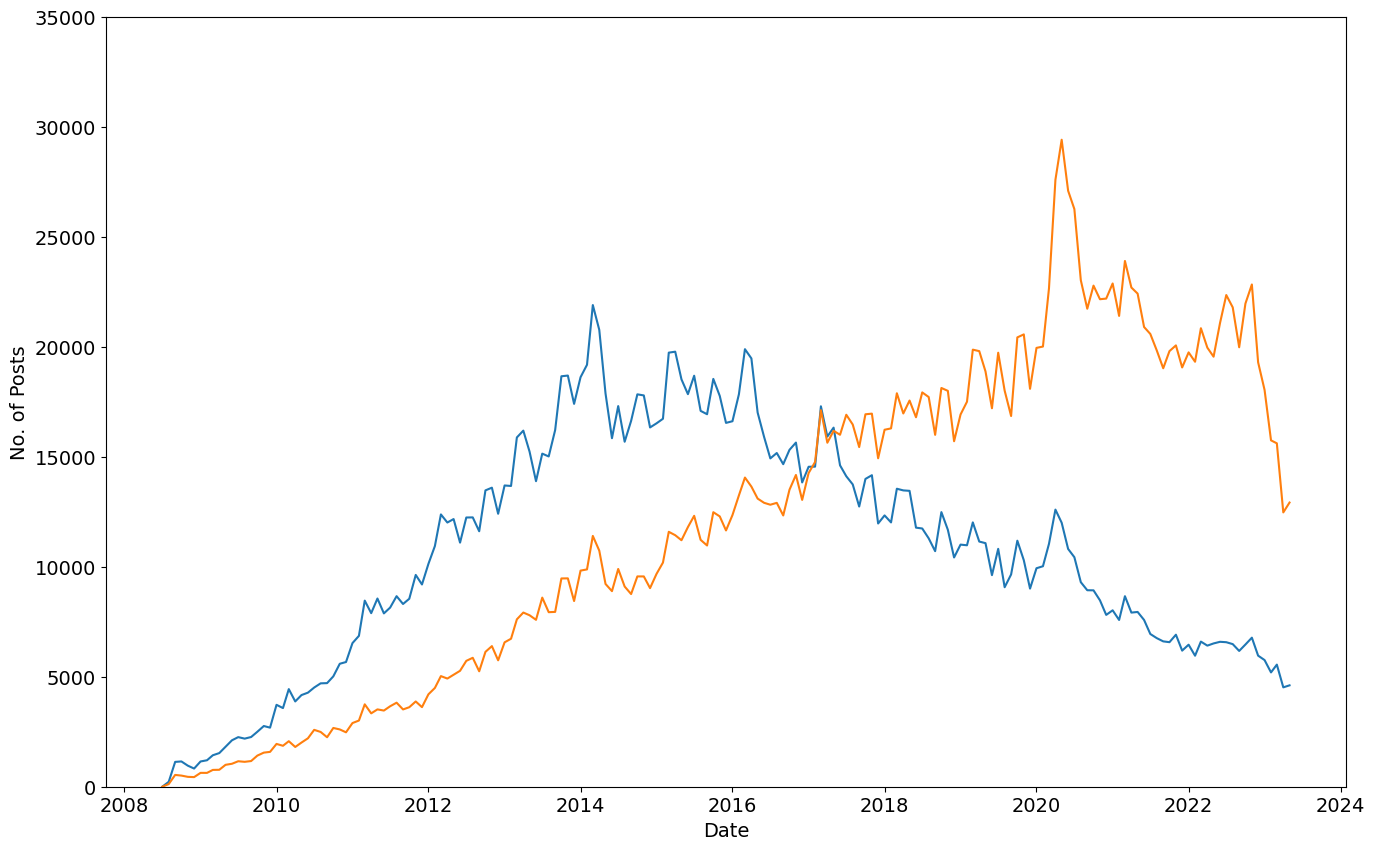

In [76]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,35000)
plt.xlabel("Date",fontsize=14)
plt.ylabel("No. of Posts",fontsize=14)
plt.plot(pivoted_df.index,pivoted_df.java)
plt.plot(pivoted_df.index,pivoted_df.python)

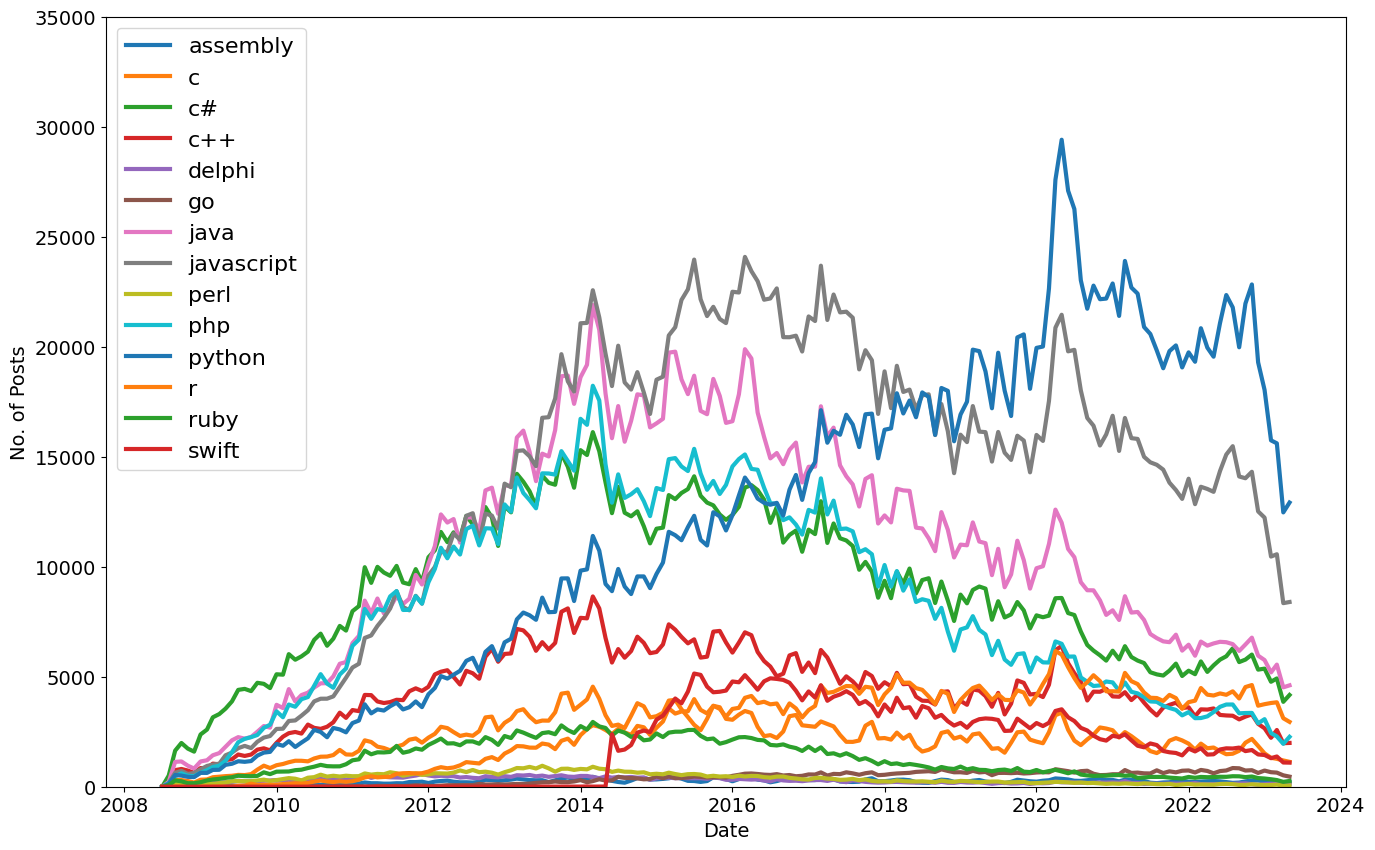

In [81]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,35000)
plt.xlabel("Date",fontsize=14)
plt.ylabel("No. of Posts",fontsize=14)
for column in pivoted_df.columns:
  plt.plot(pivoted_df.index,pivoted_df[column],
           linewidth=3,label = pivoted_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

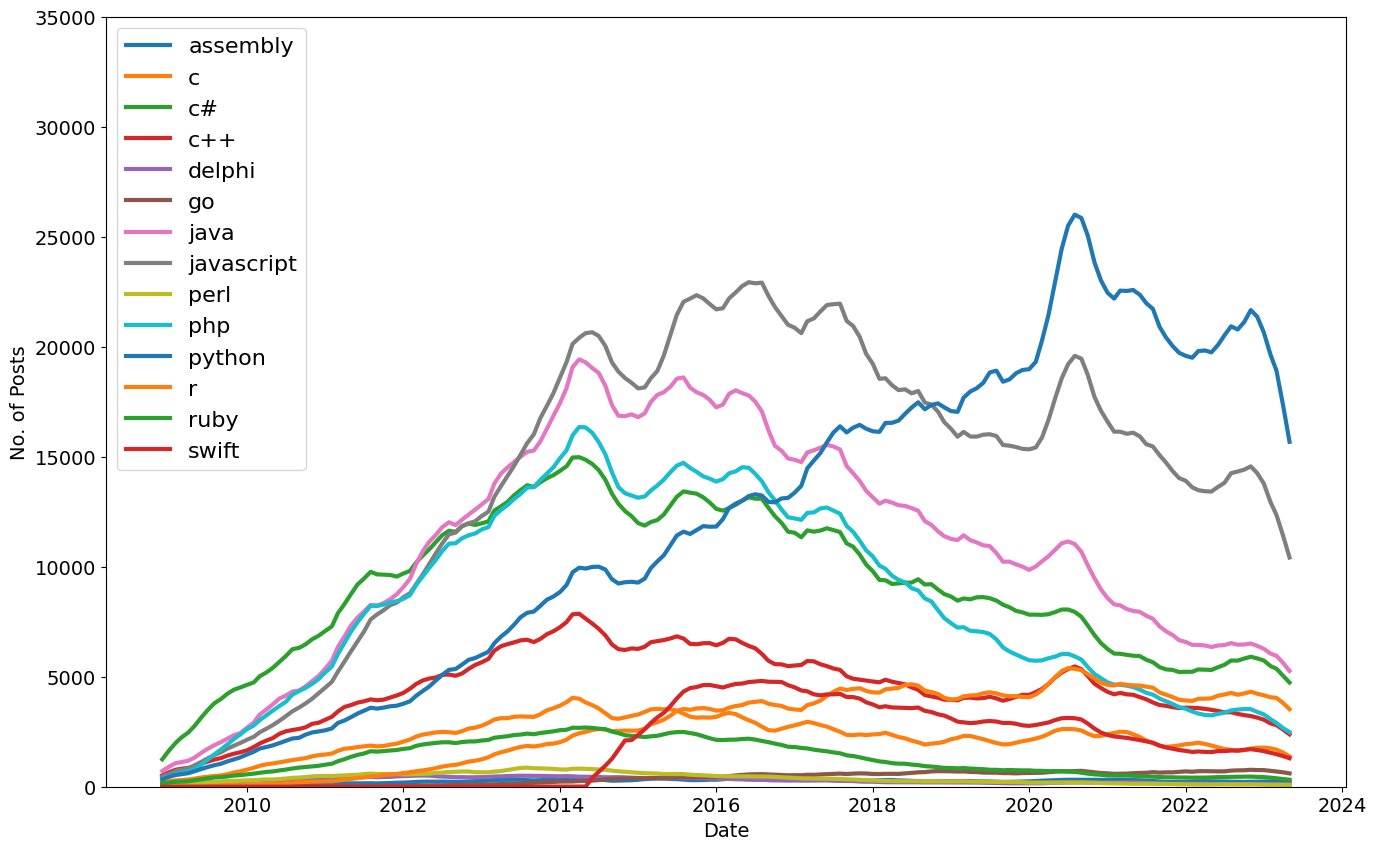

In [87]:
roll_df = pivoted_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,35000)
plt.xlabel("Date",fontsize=14)
plt.ylabel("No. of Posts",fontsize=14)
for column in roll_df.columns:
  plt.plot(pivoted_df.index,roll_df[column],
           linewidth=3,label = roll_df[column].name)

plt.legend(fontsize=16)